In [1]:
# import all the tools
import tensorflow as tf
import tensorflow.keras as keras
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roje0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\roje0001\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roje0001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Importando dados do Web Scraping

In [37]:
df = pd.read_csv('outputs/dados_avaliacão_consumidor_total.csv')

df

,Review,Rating
0,Produto superou as minhas espectativa...\nE o ...,5
1,Bom,5
2,Chegou tudo certo muito satisfeito,5
3,Excelente. Atendeu minhas expectativas.,5
4,"Muito bom, não tenho o que reclamar.",5
...,...,...
25676,Bom dia! Achei que ia vir a versão global do R...,1
25677,Perfeito.,1
25678,"Produto excelente, certeza, mas ainda não cheg...",1
25679,"Estou estranhando esse carregador, não tenho t...",1


C:\Users\roje0001\Anaconda3\envs\main\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


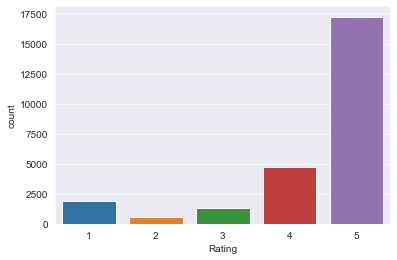

,Review
Rating,
1,1864
2,531
3,1288
4,4767
5,17231


In [45]:
# distribuição das avaliações

sns.countplot(df.Rating)
plt.show()
df.groupby('Rating').count()

# Pré processamento dos textos

In [41]:
# remove simbolos e torna maiusculo em minusculo
def format_text(df,col):
  #Remove @ tags
  comp_df = df.copy()
    
  # remove all the punctuation
  comp_df[col] = comp_df[col].str.replace(r'(@\w*)','')

  #Remove URL
  comp_df[col] = comp_df[col].str.replace(r"http\S+", "")

  #Remove # tag and the following words
  comp_df[col] = comp_df[col].str.replace(r'#\w+',"")

  #Remove all non-character
  comp_df[col] = comp_df[col].str.replace(r"[^a-zA-Z ]","")

  # Remove extra space
  comp_df[col] = comp_df[col].str.replace(r'( +)'," ")
  comp_df[col] = comp_df[col].str.strip()

  # Change to lowercase
  comp_df[col] = comp_df[col].str.lower()

  return comp_df

formated_df = format_text(df,'Review')

# Drop the columns we don't want
#formated_comp_df.drop(['id','date','flag','user'],axis=1,inplace=True)

formated_df.head()

,Review,Rating
0,produto superou as minhas espectativae o prazo...,5
1,bom,5
2,chegou tudo certo muito satisfeito,5
3,excelente atendeu minhas expectativas,5
4,muito bom no tenho o que reclamar,5


# Remove avaliações em outros idiomas

In [42]:
no_pt_es = stopwords.words('spanish')
no_pt_en = stopwords.words('english')
no_pt_it = stopwords.words('italian')
no_pt = np.concatenate([no_pt_es, no_pt_en, no_pt_it])
no_pt = [word for word in no_pt if not word in stopwords.words('portuguese')]

In [58]:
df_pt = formated_df.copy()
df_pt['Review'] = df_pt['Review'].apply(lambda s: s.split(' '))
for word in no_pt:
    index_pt = [idx for idx in df_pt.index if not word in df_pt.loc[idx, 'Review']]
    df_pt = df_pt.loc[index_pt,:]
    print(word)

la
el
en
y
los
del
las
un
con
una
su
al
lo
más
pero
sus
le
ya
sí
porque
cuando
muy
sin
sobre
también
hasta
hay
donde
quien
desde
todo
durante
todos
uno
les
ni
contra
otros
ese
eso
ante
ellos
esto
mí
antes
algunos
qué
unos
yo
otro
otras
otra
él
tanto
esa
estos
mucho
quienes
nada
muchos
cual
poco
ella
estar
algunas
algo
nosotros
mi
mis
tú
ti
tus
ellas
nosotras
vosotros
vosotras
mío
mía
míos
mías
tuyo
tuya
tuyos
tuyas
suyo
suya
suyos
suyas
nuestro
nuestra
nuestros
nuestras
vuestro
vuestra
vuestros
vuestras
esos
esas
estoy
estás
estáis
están
esté
estés
estemos
estéis
estén
estaré
estarás
estará
estaremos
estaréis
estarán
estaría
estarías
estaríamos
estaríais
estarían
estaba
estabas
estábamos
estabais
estaban
estuve
estuviste
estuvo
estuvimos
estuvisteis
estuvieron
estuviera
estuvieras
estuviéramos
estuvierais
estuvieran
estuviese
estuvieses
estuviésemos
estuvieseis
estuviesen
estando
estado
estada
estados
estadas
estad
he
has
ha
hemos
habéis
han
haya
hayas
hayamos
hayáis
hayan
habré
habrás

# Simplificando palavras
Usamos o radical no lugar da própria palavra, assim diminuimos o número de palavras no modelo

In [59]:
from nltk import PorterStemmer, word_tokenize
stemmer = PorterStemmer()

df_pt['Review'] = df_pt['Review'].apply(lambda s: ' '.join(s))

df_pt['Review'] = df_pt['Review'].apply(lambda s: word_tokenize(s))
df_pt['Review'] = df_pt['Review'].apply(lambda lst: [stemmer.stem(i) for i in lst])
df_pt['Review'] = df_pt['Review'].apply(lambda lst: ' '.join(lst))

df_pt

,Review,Rating
1,bom,5
2,chegou tudo certo muito satisfeito,5
3,excelent atendeu minha expectativa,5
4,muito bom no tenho o que reclamar,5
7,bom,5
...,...,...
25671,est aparelho est abrindo os aplicativo simulta...,1
25672,timo celular muito bom o custo benefcio,1
25674,eu preciso de ajuda meu telefon veio com o tou...,1
25677,perfeito,1


# Palavras mais frequentes

In [60]:
def show_wc(df,stopword=False):
    if stopword:
        stop_words = stopwords.words('portuguese')
        wc = WordCloud(max_words=3000, background_color='white',stopwords=stop_words,colormap='rainbow',height=500,width=1000)
    else:
        wc = WordCloud(max_words=3000, background_color='white',colormap='rainbow',height=500,width=1000)
    text =df.Review.values
    wc.generate(str(text))
    
    fig = plt.figure()
    plt.imshow(wc)
    fig.set_figwidth(10)
    fig.set_figheight(10)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

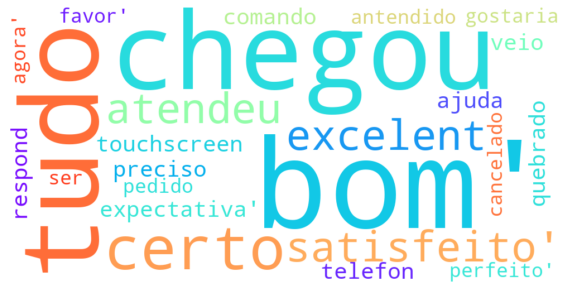

In [61]:
show_wc(df_pt, stopword=True)

# Agrupando em classes

Devido a falta de dados sobre as avaliações com rating menor que 5, agrupamos os textos em duas classes:
 - positivas (que recebem avaliações = 5)
 - negativas (que recebem avaliações < 5) 

C:\Users\roje0001\Anaconda3\envs\main\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


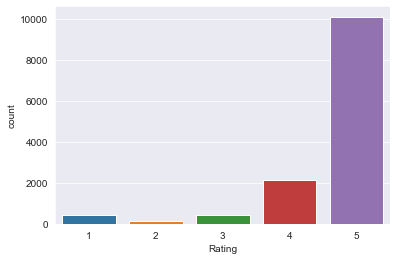

,Review
Rating,
1,413
2,125
3,423
4,2119
5,10114


In [62]:
# show the distribution of labels
sns.countplot(df_pt.Rating)
plt.show()
df_pt.groupby('Rating').count()


C:\Users\roje0001\Anaconda3\envs\main\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


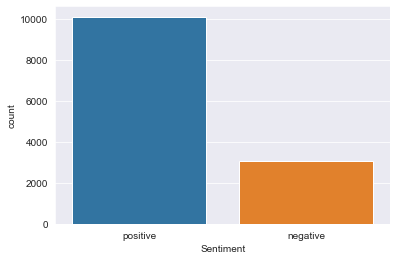

Sentiment
negative     3080
positive    10114
Name: Review, dtype: int64

In [56]:
df_pt['Sentiment'] = df_pt['Rating'].apply(lambda s: 'positive' if s==5 else 'negative')

sns.countplot(df_pt.Sentiment)
plt.show()
df_pt.groupby('Sentiment').count().Review

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 500)
X = cv.fit_transform(df_pt['Review'].values).toarray()

                --> eu, gosto, de, sp, odeio
'eu gosto de sp'    1    1      1   1   0
'eu odeio sp'       1    0      0   1   1

Arvore de Decisão

Classification Report : 
              precision    recall  f1-score   support

    negative       0.49      0.45      0.47       813
    positive       0.83      0.85      0.84      2486

    accuracy                           0.75      3299
   macro avg       0.66      0.65      0.65      3299
weighted avg       0.74      0.75      0.75      3299

Accuracy on test data: 0.75
Confusion Matrix


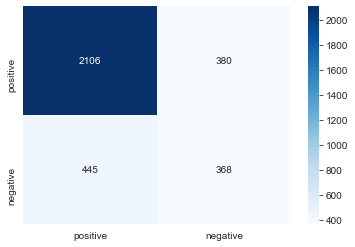

Acuraccia média: 0.8471440064360418

Floresta Aleatória

Classification Report : 
              precision    recall  f1-score   support

    negative       0.61      0.42      0.50       813
    positive       0.83      0.91      0.87      2486

    accuracy                           0.79      3299
   macro avg       0.72      0.67      0.68      3299
weighted avg       0.77      0.79      0.78      3299

Accuracy on test data: 0.79
Confusion Matrix


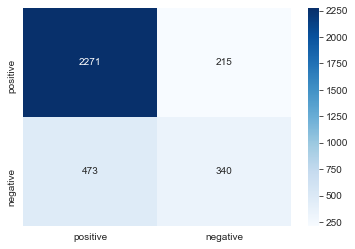

Acuraccia média: 0.913515687851971

Regressão Logistica

Classification Report : 
              precision    recall  f1-score   support

    negative       0.66      0.41      0.51       813
    positive       0.83      0.93      0.88      2486

    accuracy                           0.80      3299
   macro avg       0.74      0.67      0.69      3299
weighted avg       0.79      0.80      0.78      3299

Accuracy on test data: 0.80
Confusion Matrix


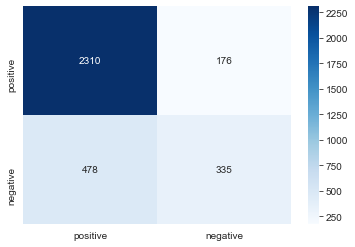

Acuraccia média: 0.9292035398230089

GradientBoosting

Classification Report : 
              precision    recall  f1-score   support

    negative       0.66      0.27      0.39       813
    positive       0.80      0.95      0.87      2486

    accuracy                           0.79      3299
   macro avg       0.73      0.61      0.63      3299
weighted avg       0.77      0.79      0.75      3299

Accuracy on test data: 0.79
Confusion Matrix


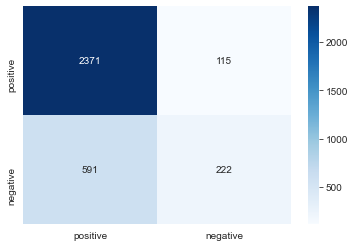

Acuraccia média: 0.9537409493161706

Suport Vector Classifier

Classification Report : 
              precision    recall  f1-score   support

    negative       0.67      0.30      0.41       813
    positive       0.81      0.95      0.87      2486

    accuracy                           0.79      3299
   macro avg       0.74      0.62      0.64      3299
weighted avg       0.77      0.79      0.76      3299

Accuracy on test data: 0.79
Confusion Matrix


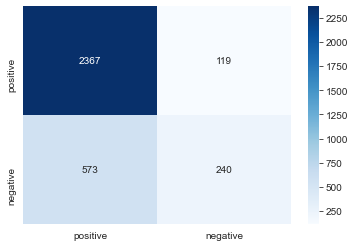

Acuraccia média: 0.9521319388576026

Naives Bayes Classifier

Classification Report : 
              precision    recall  f1-score   support

    negative       0.35      0.84      0.49       813
    positive       0.90      0.48      0.63      2486

    accuracy                           0.57      3299
   macro avg       0.62      0.66      0.56      3299
weighted avg       0.77      0.57      0.60      3299

Accuracy on test data: 0.57
Confusion Matrix


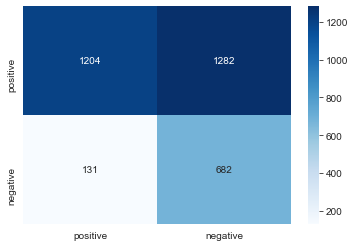

Acuraccia média: 0.48431214802896216



In [128]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, make_scorer, roc_auc_score
from numpy import random

import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

random.seed(1)

models = {
            "Arvore de Decisão": DecisionTreeClassifier(random_state = 0),
            "Floresta Aleatória": RandomForestClassifier(random_state = 0),
            "Regressão Logistica": LogisticRegression(solver='liblinear',random_state = 0),
            "GradientBoosting": GradientBoostingClassifier(random_state = 0),
            "Suport Vector Classifier": SVC(random_state = 0),
            "Naives Bayes Classifier": GaussianNB()
}
score_lst = []
#scoring = {
#           'TPR': make_scorer(true_positive_rate)}

for model_name in models.keys():
    model = models[model_name]
    tpr = cross_validate(model, X,y, cv=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(model_name+'\n')
    print('Classification Report : ' )
    print(classification_report(y_test, y_pred))
    print("Accuracy on test data: {:.2f}".format(accuracy_score(y_test, y_pred)))
    print('Confusion Matrix')
    
    cols = ['negative', 'positive']
    plt.figure(figsize=(6,4)),

    mtr = pd.DataFrame(confusion_matrix(y_test, y_pred), index = cols, columns = cols )
    mtr = mtr.loc[['positive', 'negative'], ['positive', 'negative']]
    sns.heatmap(data = mtr, annot = True, fmt='d', cmap="Blues")
    tpr = mtr.loc['positive', 'positive']/(mtr.loc['positive', 'positive'] + mtr.loc['positive', 'negative'])
    
    plt.show()
    print("Acuraccia média: {}\n".format(tpr))

In [118]:
from sklearn.model_selection import GridSearchCV

random.seed(1)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': list(range(20,200,10)),
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 8]
}
# Create a based model
GB = GradientBoostingClassifier(random_state = 0)

# Instantiate the grid search model
clf = GridSearchCV(estimator = tree, param_grid = param_grid,
                   n_jobs = -1, verbose = 2)
# Fit the grid search to the data
clf.fit(X_train, y_train)
clf.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  7.3min finished


{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2}

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


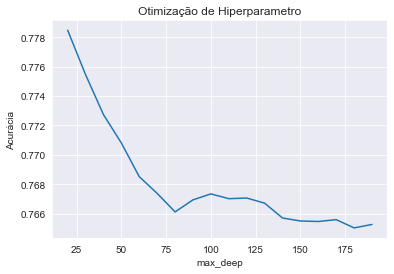

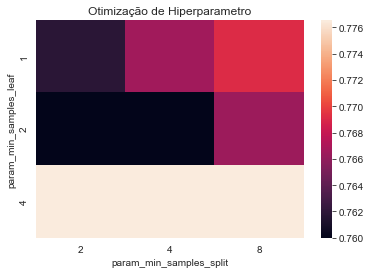

In [120]:
print(clf.cv_results_.keys())
tpr = np.array([clf.cv_results_['split{}_test_score'.format(i)] for i in range(5)]).mean(axis=0)
tpr = tpr.reshape(18,3,3)
tpr_max_deep = tpr.mean(axis=1).mean(axis=1)
tpr_min_samples = tpr.mean(axis=0)
#tpr = pd.DataFrame(tpr, )
sns.lineplot(x = range(20, 200,10), y = tpr_max_deep)
plt.title('Otimização de Hiperparametro')

plt.ylabel('Acurácia')
plt.xlabel('max_deep')
plt.show()
sns.heatmap(pd.DataFrame(tpr_min_samples, index =[1,2,4] , columns =[2,4,8]))

plt.title('Otimização de Hiperparametro')
plt.ylabel('param_min_samples_leaf')
plt.xlabel('param_min_samples_split')
plt.show()

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, roc_curve, auc, classification_report, recall_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2021)

Classification Report : 
              precision    recall  f1-score   support

    negative       0.64      0.40      0.50       813
    positive       0.83      0.93      0.87      2486

    accuracy                           0.80      3299
   macro avg       0.73      0.66      0.68      3299
weighted avg       0.78      0.80      0.78      3299

Accuracy on test data: 0.80
Confusion Matrix


<AxesSubplot:>

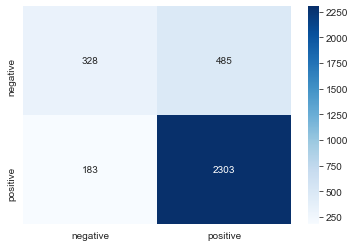

In [126]:
model = GradientBoostingClassifier(
                        max_depth =  20,
                        min_samples_leaf = 4,
                        min_samples_split =  8)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print('Classification Report : ' )
print(classification_report(y_test, y_pred))
print("Accuracy on test data: {:.2f}".format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix')

cols = ['negative', 'positive']
plt.figure(figsize=(6,4))
mtr = pd.DataFrame(confusion_matrix(y_test, y_pred), index = cols, columns = cols )
sns.heatmap(data = mtr, annot = True, fmt='d', cmap="Blues")